In [1]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
%matplotlib inline
sns.set(style="whitegrid")


/tmp/matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /tmp/matplotlib-3f2sa2b_ because there was an issue with the default path (/tmp/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# Define file paths
normal_csv_path = './results_ground_post_normal.csv'
post_csv_path = './results_ground_post.csv'

# Load CSV files into pandas DataFrames
df_normal = pd.read_csv(normal_csv_path)
df_post = pd.read_csv(post_csv_path)

# Display the first few rows of each DataFrame
print("Normal Corpus Results:")
display(df_normal.head())

print("\nPOS-Tagged Corpus Results:")
display(df_post.head())


FileNotFoundError: [Errno 2] No such file or directory: './results_ground_post_normal.csv'

In [ ]:
# Check for missing values
print("Missing values in Normal Corpus:")
print(df_normal.isnull().sum())

print("\nMissing values in POS-Tagged Corpus:")
print(df_post.isnull().sum())

# Ensure that training iterations match between both datasets
iterations_normal = set(df_normal['training iterations'])
iterations_post = set(df_post['training iterations'])

common_iterations = iterations_normal.intersection(iterations_post)
print(f"\nNumber of common training iterations: {len(common_iterations)}")

if len(common_iterations) == len(df_normal) and len(common_iterations) == len(df_post):
    print("All training iterations match between datasets.")
else:
    print("Mismatch in training iterations between datasets.")


Missing values in Normal Corpus:
training iterations    0
perplexity             0
perplexity POS         0
dtype: int64

Missing values in POS-Tagged Corpus:
training iterations    0
perplexity             0
perplexity POS         0
dtype: int64

Number of common training iterations: 10
All training iterations match between datasets.


In [ ]:
# Summary statistics for Normal Corpus
print("Summary Statistics - Normal Corpus:")
display(df_normal.describe())

# Summary statistics for POS-Tagged Corpus
print("\nSummary Statistics - POS-Tagged Corpus:")
display(df_post.describe())


Summary Statistics - Normal Corpus:


/pio/scratch/1/i317214/miniconda/envs/hallucination_detection/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/pio/scratch/1/i317214/miniconda/envs/hallucination_detection/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4720: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,training iterations,perplexity,perplexity POS
count,10.000000,10.000000,10.0
mean,55.000000,10732.091333,inf
std,30.276504,7838.465172,NaN
min,10.000000,3545.358154,inf
25%,32.500000,5686.479736,NaN
50%,55.000000,8590.416260,NaN
75%,77.500000,12574.685303,NaN
max,100.000000,29968.664062,inf



Summary Statistics - POS-Tagged Corpus:


,training iterations,perplexity,perplexity POS
count,10.000000,10.000000,10.000000
mean,55.000000,17573.174902,647.709196
std,30.276504,13921.943248,1699.540639
min,10.000000,5425.615234,3.511349
25%,32.500000,7821.497559,8.462140
50%,55.000000,11721.619141,25.309320
75%,77.500000,23086.761230,182.534435
max,100.000000,47045.734375,5450.912109


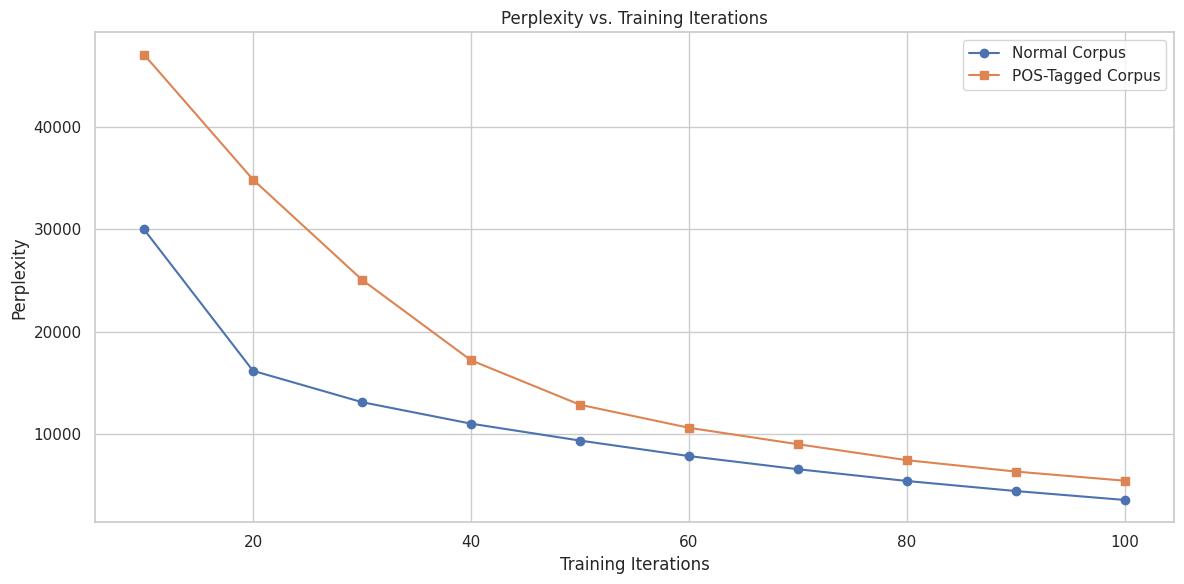

In [ ]:
# Merge the two DataFrames on 'training iterations', allowing mismatched rows and filling missing values with NaN
df_merged = pd.merge(
    df_normal, 
    df_post, 
    on='training iterations', 
    how='outer',  # Ensures all iterations from both DataFrames are included
    suffixes=('_normal', '_POS')
).sort_values(by='training iterations')  # Sort by 'training iterations' for better plotting

# Plot perplexity for both corpora
plt.figure(figsize=(12, 6))
plt.plot(df_merged['training iterations'], df_merged['perplexity_normal'], label='Normal Corpus', marker='o', linestyle='-')
plt.plot(df_merged['training iterations'], df_merged['perplexity_POS'], label='POS-Tagged Corpus', marker='s', linestyle='-')
plt.xlabel('Training Iterations')
plt.ylabel('Perplexity')
plt.title('Perplexity vs. Training Iterations')
plt.legend()
plt.tight_layout()
plt.savefig('perplexity_vs_training_iterations.png')
plt.show()